# Esercizio 12.2 e 3

Inizialmente è stata riprodotta<span style=color:red>*</span> la struttura della rete presente al link https://www.cs.ryerson.ca/~aharley/vis/conv/flat.html, per valutarne le prestazioni.

<span style=color:red>*</span>  : non ho capito come riprodurre il fatto che nella rete originale i filtri della seconda convoluzione prendono in input solo dei sottogruppi dei filtri della prima convoluzione, e ogni filtro prende un sottogruppo diverso.

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples
Epoch 1/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.5179 - accuracy: 0.8437 - val_loss: 0.1866 - val_accuracy: 0.9438
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1554 - accuracy: 0.9531 - val_loss: 0.1333 - val_accuracy: 0.9572
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1115 - accuracy: 0.9662 - val_loss: 0.0857 - val_accuracy: 0.9731
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0917 - accuracy: 0.9719 - val_loss: 0.0707 - val_accuracy: 0.9783
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0795 - accuracy: 0.9757 - val_loss: 0.0672 - val_accuracy: 0.9786
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0702 - accuracy: 0.9781 - val_loss: 0.0630 - val_accuracy: 0.9798
Epoch 7/10
1875/1875 [=================

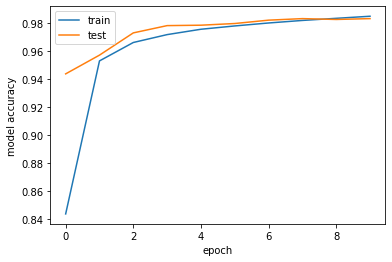

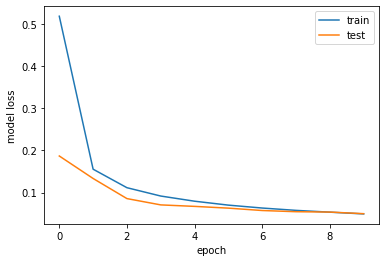

In [42]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPooling2D, AveragePooling2D


def create_CNN():
    # instantiate model
    model = Sequential()
    # First convolution (6 filters) + Pooling
    model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D())
    # Second convolution (12 filters) + Pooling
    model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
    model.add(MaxPooling2D())
    # Flatten + Dense 100 neurons + Output
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='sgd',
                  metrics=['accuracy'])
    return model

# Preparing data
seed=0
np.random.seed(seed)
tf.random.set_seed(seed)
img_rows, img_cols = 28, 28 
num_classes = 10
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

batch_size = 32
epochs = 10

model_CNN = create_CNN()

history = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

## Versione migliorata

Sono state provate svariate modifiche nel tentativo di migliorare le prestazioni della rete originale. Di seguito sono descritte solo le modifiche che sono state mantenute nella versione definitiva:

    - L'utilizzo di Adam come ottimizzatore porta a un immediato aumento delle prestazioni;
    - Aggiunta di layer di dropout per eliminare un possibile problema di overfitting introdotto da Adam;
    - Il numero dei filtri nelle due convoluzioni è triplicato;
    - Si ripresenta il presunto overfitting, dropout rate aumentato da 10% a 20% per eliminarlo.

**In conclusione con le modifiche apportate l'accuratezza della rete aumenta da 98.3% a 99.2%.**

<span style=color:green>*  : dopo l'introduzione di Adam si osserva che, nelle epoche successive alla quinta, l'accuratezza nel training continua ad aumentare mentre l'accuratezza di valutazione smette di crescere.</span>


X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples
Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1450 - accuracy: 0.9559 - val_loss: 0.0472 - val_accuracy: 0.9868
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0514 - accuracy: 0.9839 - val_loss: 0.0401 - val_accuracy: 0.9893
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0393 - accuracy: 0.9879 - val_loss: 0.0309 - val_accuracy: 0.9900
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0325 - accuracy: 0.9896 - val_loss: 0.0245 - val_accuracy: 0.9921
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0289 - accuracy: 0.9908 - val_loss: 0.0263 - val_accuracy: 0.9924
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0240 - accuracy: 0.9921 - val_loss: 0.0220 - val_accuracy: 0.9929
Epoch 7/10
1875/1875 [=======

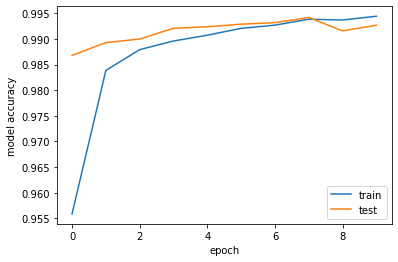

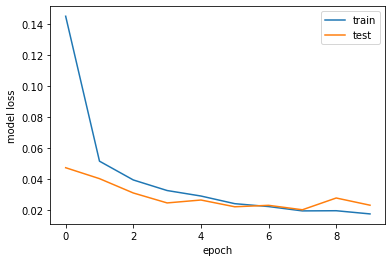

In [43]:
def create_CNN():
    # instantiate model
    model = Sequential()
    # First convolution (18 filters) + Dropout + Pooling
    model.add(Conv2D(18, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
    model.add(Dropout(rate=0.2))
    model.add(MaxPooling2D())
    # Second convolution (48 filters) + Dropout + Pooling
    model.add(Conv2D(48, kernel_size=(5, 5), activation='relu'))
    model.add(Dropout(rate=0.2))
    model.add(MaxPooling2D())
    # Flatten + Dropout + Dense 100 neurons + Output
    model.add(Flatten())
    model.add(Dropout(rate=0.2))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='Adam',
                  metrics=['accuracy'])
    return model

# Preparing data
seed=0
np.random.seed(seed)
tf.random.set_seed(seed)
img_rows, img_cols = 28, 28 
num_classes = 10
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

batch_size = 32
epochs = 10

model_CNN = create_CNN()

history = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

model_CNN.save("Number_rec.keras")

# Esercizio 12.3

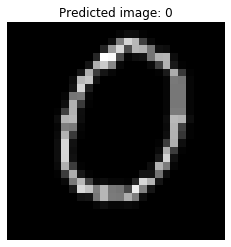

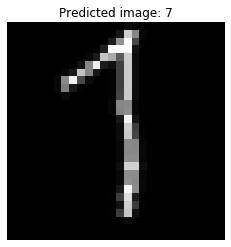

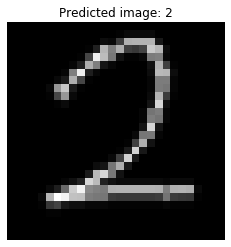

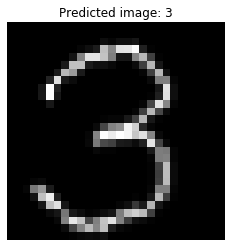

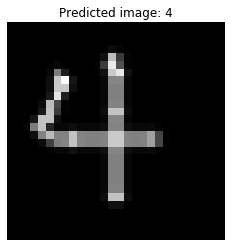

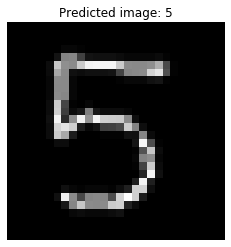

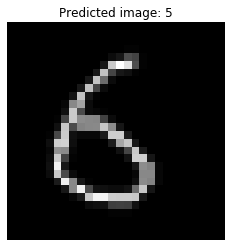

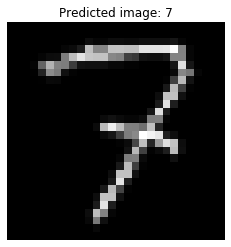

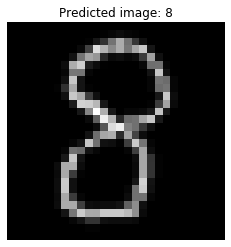

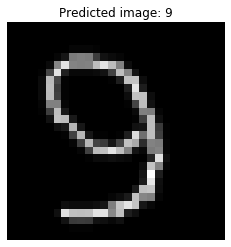

In [113]:
from PIL import Image
import os

final_model=tf.keras.models.load_model("Number_rec.keras")

for k in range(10):
    digit_filename = 'Pictures/'+str(k)+'.png'
    digit_in = Image.open(digit_filename).convert('L')

    ydim, xdim = digit_in.size
    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]
    data /= 255

    if keras.backend.image_data_format() == 'channels_first':
        data = data.reshape(1, 1, img_rows, img_cols)
    else:
        data = data.reshape(1, img_rows, img_cols,1)

    prediction = final_model.predict(data) 
    data = data.reshape(img_rows, img_cols)

    plt.imshow(data, cmap='gray')
    plt.title('Predicted image: '+str(np.argmax(prediction)))
    plt.axis('off')
    plt.show()